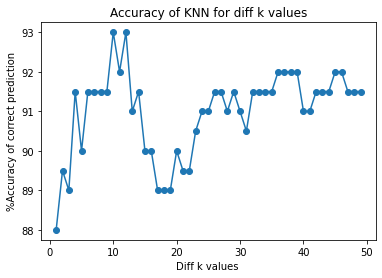

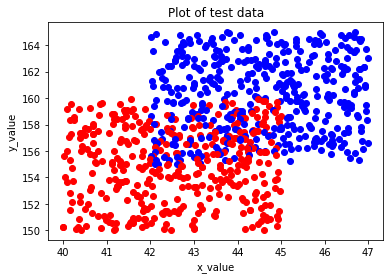

In [ ]:
#Q1) KNN classifier:
import numpy as np
import matplotlib.pyplot as plt
with open("/content/drive/MyDrive/Lab5_data/Lab5/knn-train.txt", "r") as file1:
    train_set=file1.read()
train_coord=[]
line=train_set.split("\n")      
for i in line:
    data=i.split("\t")
    train_coord.append([float(data[0]),float(data[1]),float(data[2])])

colmap={1:'r',2:'g',3:'b',4:'m',5:'y',6:'grey',7:'tan',8:'plum',9:'lightgreen',10:'coral'}
with open("/content/drive/MyDrive/Lab5_data/Lab5/knn-test.txt", "r") as file2:
    test_set=file2.read()
test_coord=[]
test_line=test_set.split("\n")      
for i in test_line:
    test_data=i.split("\t")
    test_coord.append([float(test_data[0]),float(test_data[1]),float(test_data[2])])

def Eucl_dist_square(x,y,x1,y1):       #Function to compute square of euclidian distance
    return (x-x1)**2+(y-y1)**2

def KNN(K, new_coord,t_set):
    t_set.sort(key=lambda x:Eucl_dist_square(new_coord[0],new_coord[1],x[0],x[1]))  #sorting as per the distance from test_coordinate
    neg=0       #To count the no. of -1 values of y
    pos=0       #To count the no. of +1 vaalue of y
    for i in range(K):
        if t_set[i][2]==1:      
            pos+=1
        else:
            neg+=1
    if pos>neg:    #If the count of +1 is greater then return +1
        return 1
    else:
        return -1

def KNN_acc(k):         #Function to measure the accuracy of KNN function
    correct=0           #If KNN returns correct value
    wrong=0             #If KNN returns wrong value
    for i in range(len(test_coord)):
        if(test_coord[i][2]==KNN(k,test_coord[i],train_coord)):
            correct+=1
        else:
            wrong+=1
    return float((correct/len(test_coord))*100) #Returning percentage of accuracy for a particular k

k_values=[]
percent_acc=[]
for i in range(1,50):
    k_values.append(i)
    percent_acc.append(KNN_acc(i))
plt.plot(k_values,percent_acc,marker='o')
plt.xlabel("Diff k values ")
plt.ylabel("%Accuracy of correct prediction")
plt.title("Accuracy of KNN for diff k values")
plt.show()

for i in range(len(train_coord)):
    plt.scatter(train_coord[i][0],train_coord[i][1],color=colmap[int(train_coord[i][2])+2])
plt.xlabel("x_value")
plt.ylabel("y_value")
plt.title("Plot of test data")
plt.show()
file2.close()
file1.close()

The value of R: 164.99445948247956


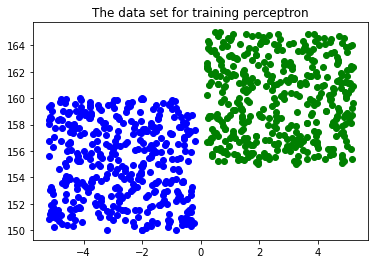

The value of w:( 1404.2065065561903 -1.1210930581405876 )
The value of gamma: 0.08324745177439352
The no of iterations for the perceptron to converge: 565
The value of p=(R/gamma)^2 is: 3928229.2457210263
No of iterations would be less than p always.


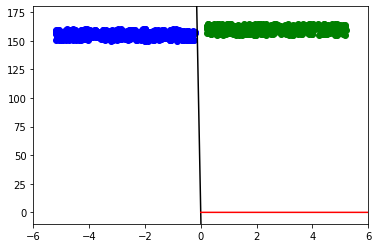

The accuracy of perceptron algorithm is: 100.0 %


In [4]:
#   Q2) Perceptron classifier:
import numpy as np
import math
import matplotlib.pyplot as plt
with open("/content/drive/MyDrive/Lab5_data/Lab5/perceptron-train.txt", "r") as file3:
    train_setp=file3.read()
train_coord=[]
j=0
line=train_setp.split("\n")      
for i in line:
    data=i.split("\t")
    j+=1
    train_coord.append([float(data[0]),float(data[1]),float(data[2])])
    if(j==800):
        break
colmap={1:'b',2:'g',3:'g',4:'m',5:'y',6:'grey',7:'tan',8:'plum',9:'lightgreen',10:'coral'}
with open("/content/drive/MyDrive/Lab5_data/Lab5/perceptron-test.txt", "r") as file4:
    test_setp=file4.read()
test_coord=[]
j=0
test_line=test_setp.split("\n")      
for i in test_line:
    test_data=i.split("\t")
    test_coord.append([float(test_data[0]),float(test_data[1]),float(test_data[2])])
    j+=1
    if(j==200):
        break

R=0
def Eucl_dist(x1,y1,x2,y2):
    return math.sqrt((x1-x2)**2+(y1-y2)**2)

for i in range(len(train_coord)):
    R=max(R,Eucl_dist(0,0,train_coord[i][0],train_coord[i][1]))
print("The value of R:",R)

def dot_product(t,w):           #Function to find dot product of two vectors
    return t[0]*w[0]+t[1]*w[1]

def perceptron():               #Perceptron function to learn the line from train dataset
    w=np.zeros(2)
    # t=np.random.randint(1,len(train_coord))
    # w[0]=train_coord[t][0]
    # w[1]=train_coord[t][1]
    no_of_itr=0
    gamma=1000000
    for itr in range(200):      #We will stop the loop when the line converges
        converge=0
        for i in range(len(train_coord)):   #For checking each coordinate if its missclassified or not
            # gamma=min(gamma,abs(dot_product(train_coord[i],w)))
            if(dot_product(train_coord[i],w)*(train_coord[i][2]))<=0:   #train_coord[i][2] it represent the class it belongs to
                w[0]+=train_coord[i][0]*train_coord[i][2]
                w[1]+=train_coord[i][1]*train_coord[i][2]
                no_of_itr+=1
                converge+=1
        if(converge==0):
            break
    mod_w=math.sqrt(w[0]**2+w[1]**2)
    for i in range(len(train_coord)):   #For checking each coordinate if its missclassified or not
        gamma=min(gamma,train_coord[i][2]*(dot_product(train_coord[i],w))/mod_w)
    return (w,no_of_itr-1,gamma)

def prcpt_acc(k):                       #To find the accuracy of the perceptron function
    y_value=0
    correct=0
    wrong=0
    for i in range(len(test_coord)):
        if (dot_product(test_coord[i],k))>0:
            y_value=1
        else:
            y_value=-1
        if y_value==test_coord[i][2]:
            correct+=1
        else:
            wrong+=1
    return ((correct/len(test_coord)*100))

for i in range(len(train_coord)):
    plt.scatter(train_coord[i][0],train_coord[i][1],color=colmap[train_coord[i][2]+2])
plt.title("The data set for training perceptron")
plt.show()
w,iterations,gamma=perceptron()
print("The value of w:(",w[0],w[1],")")
print("The value of gamma:",gamma)
print("The no of iterations for the perceptron to converge:",iterations)
print("The value of p=(R/gamma)^2 is:",R*R/gamma/gamma)
print("No of iterations would be less than p always.")
x= np.linspace(-6,6,1000)
x1= np.linspace(0,6,1000)

for i in range(len(train_coord)):
    plt.scatter(train_coord[i][0],train_coord[i][1],color=colmap[train_coord[i][2]+2])
plt.plot(x,(w[0]/w[1])*x,color='black')           #Plotting wTx=0
plt.plot([0,w[0]],[0,w[1]],color='r')
plt.xlim([-6,6])
plt.ylim([-10,180])
plt.show()
 
Accuracy_perceptron=prcpt_acc(w)
print("The accuracy of perceptron algorithm is:",Accuracy_perceptron,"%")
file4.close()
file3.close()

The value of R: 170.87159889918587


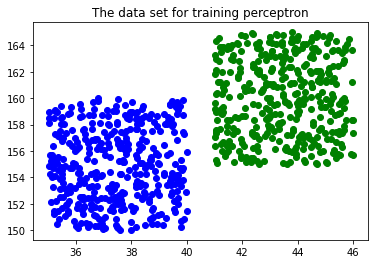

The value of gamma: 4.746582222426147e-05
The no of iterations for the perceptron to converge: 14052950
The value of p=(R/gamma)^2 is: 12959186796490.807
No of iterations would be less than p always.


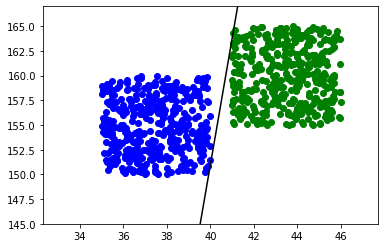

The accuracy of perceptron algorithm is: 100.0 %


In [ ]:
#Q3)Biased perceptron
import numpy as np
import matplotlib.pyplot as plt
import math
with open("/content/drive/MyDrive/Lab5_data/Lab5/perceptron-biased-train.txt", "r") as file5:
    train_setp=file5.read()
train_coord=[]
j=0
line=train_setp.split("\n")      
for i in line:
    data=i.split("\t")
    j+=1
    train_coord.append([float(data[0]),float(data[1]),float(data[2])])
    if(j==800):
        break
colmap={1:'b',2:'g',3:'g',4:'m',5:'y',6:'grey',7:'tan',8:'plum',9:'lightgreen',10:'coral'}
with open("/content/drive/MyDrive/Lab5_data/Lab5/perceptron-biased-test.txt", "r") as file6:
    test_setp=file6.read()
test_coord=[]
j=0
test_line=test_setp.split("\n")      
for i in test_line:
    test_data=i.split("\t")
    test_coord.append([float(test_data[0]),float(test_data[1]),float(test_data[2])])
    j+=1
    if(j==200):
        break

R=0
def Eucl_dist(x1,y1,x2,y2):
    return math.sqrt((x1-x2)**2+(y1-y2)**2)

for i in range(len(train_coord)):
    R=max(R,Eucl_dist(0,0,train_coord[i][0],train_coord[i][1]))
print("The value of R:",R)

def dot_product(t,w):           #Function to find dot product of two vectors
    return w[0]+t[0]*w[1]+t[1]*w[2]

def perceptron_3():               #Perceptron function to learn the line from train dataset
    w=np.zeros(3)
    w[1]=1
    w[2]=2
    no_of_itr=0
    gamma=1000000
    converge=1
    z=0
    while converge!=0 and z!=1000000:     #We will stop the loop when the line converges
        converge=0
        for i in range(len(train_coord)):   #For checking each coordinate if its missclassified or not
            # print(gamma)
            if(dot_product(train_coord[i],w)*(train_coord[i][2]))<=0:   #train_coord[i][2] it represent the class it belongs to
                w[0]+=train_coord[i][2]
                w[1]+=train_coord[i][0]*train_coord[i][2]
                w[2]+=train_coord[i][1]*train_coord[i][2]
                no_of_itr+=1
                converge+=1
        z+=1
    mod_w=math.sqrt(w[1]**2+w[2]**2+w[0]**2)            #To find the length of the w vector
    for i in range(len(train_coord)):   
        gamma=min(gamma,train_coord[i][2]*(dot_product(train_coord[i],w))/mod_w)
    return (w,no_of_itr,gamma)

def prcpt_acc(k):               #Function to find the accuracy of perceptron function
    y_value=0
    correct=0
    wrong=0
    for i in range(len(test_coord)):
        if (dot_product(test_coord[i],k))>0:
            y_value=1
        else:
            y_value=-1
        if y_value==test_coord[i][2]:
            correct+=1
        else:
            wrong+=1
    return ((correct/len(test_coord)*100))
for i in range(len(train_coord)):
    plt.scatter(train_coord[i][0],train_coord[i][1],color=colmap[train_coord[i][2]+2])
plt.title("The data set for training perceptron")
plt.show()
w,iterations,gamma=perceptron_3()           
print("The value of gamma:",gamma)
print("The no of iterations for the perceptron to converge:",iterations)
print("The value of p=(R/gamma)^2 is:",R*R/gamma/gamma)
print("No of iterations would be less than p always.")
for i in range(len(train_coord)):
    plt.scatter(train_coord[i][0],train_coord[i][1],color=colmap[train_coord[i][2]+2])
x= np.linspace(33,47,1000)
y=(w[1]/w[2])*x+(w[0]/w[2])
plt.plot(x,(-1)*(w[1]/w[2])*x-(w[0]/w[2]),color='black')        #Plotting the line seperating the two different kid of set
plt.ylim([145,167])
plt.show()
Accuracy_perceptron=prcpt_acc(w)
print("The accuracy of perceptron algorithm is:",Accuracy_perceptron,"%")
file6.close()
file5.close()